# Multi-stage Gibbs Sampler for clinical mastisis data


A solution to exercise 10.10. 


## Overview of the problem


Let $X_i, i=1, ..., m$ be the number of cases of mastisis (an inflammation caused by infection) in herd $i$. Assuming that the occurrence or not of a mastisis for a single animal is a Bernouilli random variable, a model for the herd could be:   $$X_i \sim \mathcal{P}(\lambda_i)$$ 
where $\lambda_i$ is the infection rate. The main problem here is the independence which could lead to larger parameter estimates variances. Schukken et al. 1991 use thus a hierarchical model :

$$X_i \sim \mathcal{P}(\lambda_i) $$
$$\lambda_i \sim \mathcal{G}a(\alpha, \beta_i) $$
$$\beta_i  \sim \mathcal{G}a(a, b) $$

## Gibbs sampler

In the Multi-stage Gibbs Sampler context, we want to simulate $X = (X_1, ..., X_p)$ and we suppose that we are able to simulate from univariate conditionnal densities $f_1, ..., f_p$, so that :
$$X_i | x_1, x_2, ..., x_{i-1},x_{i+1}, ...,x_p \sim f_i(x_i | x_1, x_2, ..., x_{i-1},x_{i+1}, ...,x_p )$$
The Gibbs Sampler simulates $x^{t+1}$ from $x^{t}$ by doing the following updates at time $t$ : 

Generate : 
- $X_1^{t+1} \sim f_1(x_1 | x_2^t, ..., x_p^t) $
- $X_2^{t+1} \sim f_2(x_2 | x_1^{t+1},x_3^t ..., x_p^t) $
- ...
- $X_p^{t+1} \sim f_p(x_p | x_1^{t+1}, ..., x_{p-1}^{t+1}) $

In our case, $\lambda_i, \beta_i$ are to be simulated. Let's first compute their posterior densities. 

## (a) Posterior densities computation

We know that (demonstrations in .pdf report):
$$\pi(\lambda_i | \alpha, \beta_i)= \mathcal{G}a(x_i+\alpha, \beta_i+1)$$
$$\pi(\beta_i  | x, \alpha, a, b, \lambda_i) = \mathcal{G}a(\alpha+a, \lambda_i+b)$$

## (b) Gibbs Sampler

We now want to implement the Gibbs Sampler to simulate $\lambda_i, \beta_i$, with $\alpha=0.1, a= b=1$:


In [1]:
# First implement dataset : 

mastisis_per_herd = ([0]*7 + [1]*12 + [2]*8 + [3]*9 + [4]*8 + [5]*8 + [6]*9 + [7]*6 + [8]*5 + [9]*3 + [10]*4
                     + [11]*7 + [12]*4 + [13]*5 + [14]*2 + [15]*1 + [16]*4 + [17]*3 + [18]*3 + [19]*4 + [20]*2 
                     + [21]*2 + [22]*4 + [23]*1 + [25]*6)
len(mastisis_per_herd)

127

In [38]:
# Import the librairy for gamma simulations. 
import numpy as np

# Define lambda_0 and beta_0 
lambda0 = 0
beta0 = 0
alpha = 0.1
a = 1
b = 1
# Define the iteration function for the gibbs sampler:

def iteration_gibbs(x, lambdaT, betaT, a, b, alpha):
    lambdaT1 = np.random.gamma(shape=(x+alpha), scale=(1/(1+betaT)))
    betaT1 = np.random.gamma(shape=(alpha+a), scale=(1/(lambdaT1+b)))
    return lambdaT1, betaT1


def generate_n_samples_gibbs(x0, lambda0, beta0, a, b, alpha, n):
    lamb = [lambda0]*n
    beta = [beta0]*n
    for i in range(1, n):
        lamb[i], beta[i] = iteration_gibbs(x0, lamb[i-1], beta[i-1], a, b, alpha)
    return lamb, beta

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

def plot_simulation(lamb, beta, n_herd):
    nsims = len(lamb)
    plt.figure()
    herd = 'Herd '+str(n_herd)
    plt.subplot(2, 2, 1)
    plt.xlabel('Lambda ' + herd)
    plt.ylabel('Density')
    plt.hist(lamb, bins=100, weights=[1/nsims]*nsims)
    
    plt.subplot(2, 2, 3)
    plt.xlabel('Iteration')
    plt.ylabel('Running Means')
    lamb2 = running_mean(lamb, 500)
    plt.plot(lamb2)
    
    plt.subplot(2, 2, 2)
    plt.xlabel('Beta ' + herd )
    plt.ylabel('Density')
    plt.hist(beta, bins=100, weights=[1/nsims]*nsims)
    
    plt.subplot(2, 2, 4)
    plt.xlabel('Iteration')
    plt.ylabel('Running Means')
    beta2 = running_mean(beta, 500)
    plt.plot(beta2)


## Simulation for herd 5

In [31]:
lamb, beta = generate_n_samples_gibbs(mastisis_per_herd[4], lambda0, beta0, a, b, alpha, 5000)

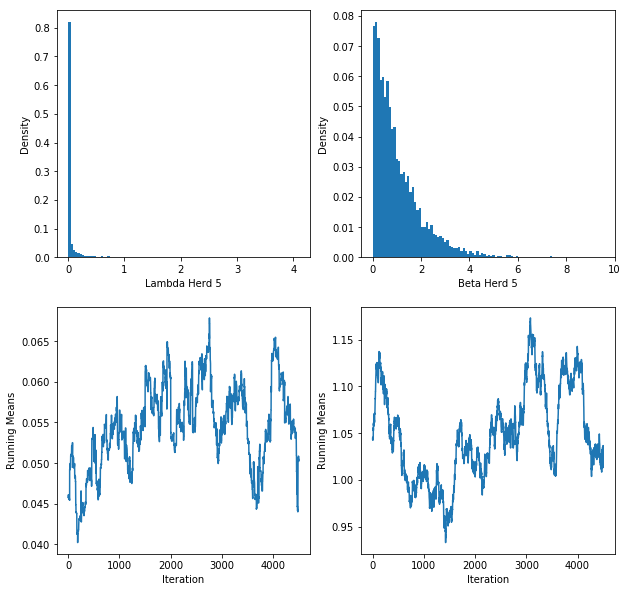

In [39]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10)

plot_simulation(lamb, beta, 5)

## Simulation for herd 15

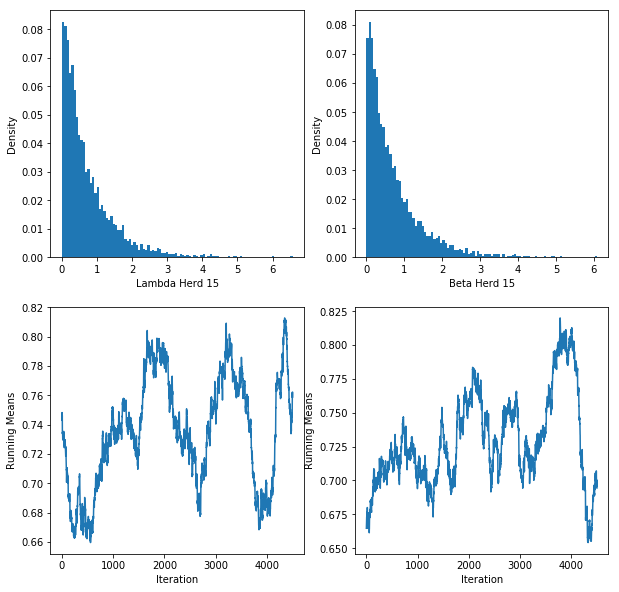

In [40]:
lamb, beta = generate_n_samples_gibbs(mastisis_per_herd[14], lambda0, beta0, a, b, alpha, 5000)
plot_simulation(lamb, beta, 15)

## Simulation for herd 100

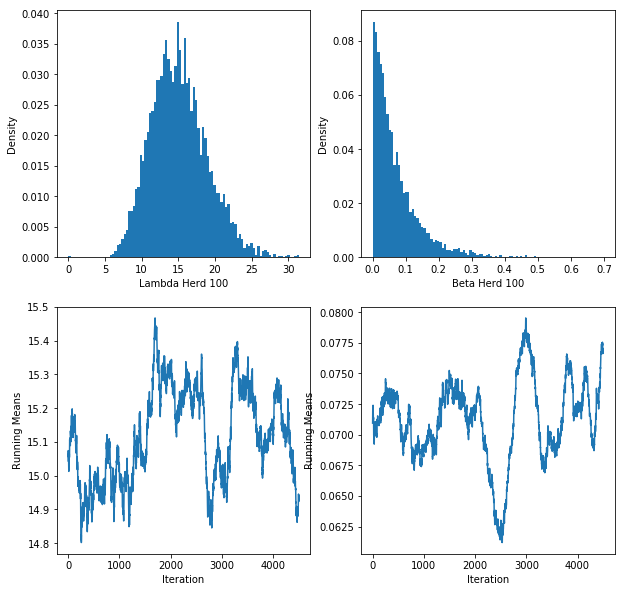

In [43]:
lamb, beta = generate_n_samples_gibbs(mastisis_per_herd[99], lambda0, beta0, a, b, alpha, 5000)
plot_simulation(lamb, beta, 100)